# <p style="text-align:center;color:#0000FF;background-color:#00FFFF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">CRITICAL TEMPERATURE OF FERROELECTRIC (Tc) </p>

# Introduction
![image.png](attachment:image.png)


TESTING THE DATASET

# Table of Contents
* [Import Libraries and Dataset](#section-1)
* [Dataset Analysing and cleaning](#section-2)
* [Data Visualization - EDA](#section-3)
* [Data Preprocessing](#section-4)
* [Model Training](#section-5)
    - [Linear Regression](#section-5.1)
    - [Decision Tree Regressor](#section-5.2)
    - [Gradient Boosting Regressor](#section-5.3)
    - [Random Forest Regressor](#section-5.4)
    - [KNeighborsRegressor](#section-5.5)
    - [SVM Regressor](#section-5.6)
    - [Ridge Regression](#section-5.7)
    - [Lasso Regression](#section-5.8)
* [Comparision of Different Regression Models](#section-6)
* [Hyperparameter Tuning](#section-7)
* [Data prediction](#section-8)
* [Conclusion & Future Scope](#section-9)

<a id="section-1"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">1. Import Libraries and Dataset </p>


# 

In [6]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
# Load the dataset

train_df = pd.read_csv("regression_dataset.csv")

In [113]:
# dataset1 
train_df

,Compound,xBi(Me1Me2)O3,xPT,Tolerance_Factor,Ionic_Displacements,Ferroelectric_Tc_in_Kelvin
0,BiFeO3-PT,0.20,0.80,1.0152,0.0878,816
1,BiFeO3-PT,0.30,0.70,1.0095,0.0935,840
2,BiFeO3-PT,0.40,0.60,1.0036,0.0994,864
3,BiFeO3-PT,0.50,0.50,0.9975,0.1055,915
4,BiFeO3-PT,0.60,0.40,0.9916,0.1114,956
...,...,...,...,...,...,...
127,Bi(ScIn)O3-PT,0.35,0.65,0.9854,0.0789,728
128,Bi(ScIn)O3-PT,0.37,0.63,0.9831,0.0791,718
129,Bi(ScGa)O3-PT,0.25,0.75,1.0057,0.0771,798
130,Bi(ScFe)O3-PT,0.40,0.60,0.9842,0.0839,728


<a id="section-2"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">2. Dataset Analysing and cleaning</p>

In [4]:
print("Dataset1 shape:", train_df.shape)
print("Dataset1 size:", train_df.size)


Dataset1 shape: (132, 6)
Dataset1 size: 792


In [29]:
#Checking number of unique rows in each feature

train_df.nunique()

Compound                       21
xBi(Me1Me2)O3                  34
xPT                            34
Tolerance_Factor              117
Ionic_Displacements            88
Ferroelectric_Tc_in_Kelvin     99
dtype: int64

In [9]:

categorical_columns = train_df.select_dtypes(include=['object'])

# If you want to include columns with integer data type as well, you can do:
numeric_columns = train_df.select_dtypes(include=['number'])

# If you want to exclude certain columns from the numerical or categorical DataFrame, you can use drop
# For example, if 'Me3' is considered categorical but mistakenly detected as numeric:
# numeric_columns = numeric_columns.drop(columns=['Me3'])

print("\nCategorical DataFrame:")
categorical_columns.head()


Categorical DataFrame:


,Compound
0,BiFeO3-PT
1,BiFeO3-PT
2,BiFeO3-PT
3,BiFeO3-PT
4,BiFeO3-PT


In [10]:
# Perform one-hot encoding on categorical columns
categorical_encoded = pd.get_dummies(categorical_columns)

# Concatenate numerical columns with the one-hot encoded categorical columns
df_encoded = pd.concat([numeric_columns, categorical_encoded], axis=1)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,xBi(Me1Me2)O3,xPT,Tolerance_Factor,Ionic_Displacements,Ferroelectric_Tc_in_Kelvin,Compound_Bi(CoFe)O3-PT,Compound_Bi(GaSc)O3-PT,Compound_Bi(MgNb)O3-PT,Compound_Bi(MgTi)O3-PT,Compound_Bi(MgW)O3-PT,...,Compound_Bi(ZnW)O3-PT,Compound_Bi(ZnZr)O3-PT,Compound_BiAlO3-PT,Compound_BiFeO3-PT,Compound_BiGaO3-PT,Compound_BiInO3-PT,Compound_BiLuO3-PT,Compound_BiMnO3-PT,Compound_BiScO3-PT,Compound_BiZnTiO3-PT
0,0.2,0.8,1.0152,0.0878,816,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0.3,0.7,1.0095,0.0935,840,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.4,0.6,1.0036,0.0994,864,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0.5,0.5,0.9975,0.1055,915,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.6,0.4,0.9916,0.1114,956,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   xBi(Me1Me2)O3               132 non-null    float64
 1   xPT                         132 non-null    float64
 2   Tolerance_Factor            132 non-null    float64
 3   Ionic_Displacements         132 non-null    float64
 4   Ferroelectric_Tc_in_Kelvin  132 non-null    int64  
 5   Compound_Bi(CoFe)O3-PT      132 non-null    bool   
 6   Compound_Bi(GaSc)O3-PT      132 non-null    bool   
 7   Compound_Bi(MgNb)O3-PT      132 non-null    bool   
 8   Compound_Bi(MgTi)O3-PT      132 non-null    bool   
 9   Compound_Bi(MgW)O3-PT       132 non-null    bool   
 10  Compound_Bi(MgZr)O3-PT      132 non-null    bool   
 11  Compound_Bi(NiNb)O3-PT      132 non-null    bool   
 12  Compound_Bi(ScFe)O3-PT      132 non-null    bool   
 13  Compound_Bi(ScGa)O3-PT      132 non

<a id="section-3"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">3. Data Visualization - EDA</p>

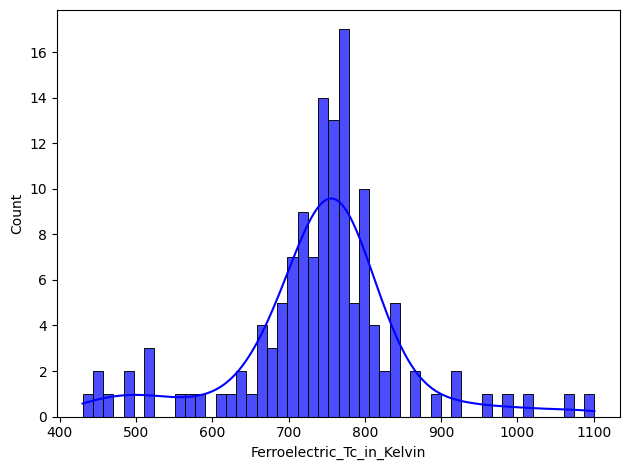

In [28]:
# PLOTTING TEMPERATURE DISTRIBUTION

# Create a figure and axes for subplots

sns.histplot(df_encoded['Ferroelectric_Tc_in_Kelvin'], kde=True, color='blue', bins=50, alpha=0.7)
figsize=(5,15)
plt.tight_layout()
plt.show()

In [32]:
train_df

,Compound,xBi(Me1Me2)O3,xPT,Tolerance_Factor,Ionic_Displacements,Ferroelectric_Tc_in_Kelvin
0,BiFeO3-PT,0.20,0.80,1.0152,0.0878,816
1,BiFeO3-PT,0.30,0.70,1.0095,0.0935,840
2,BiFeO3-PT,0.40,0.60,1.0036,0.0994,864
3,BiFeO3-PT,0.50,0.50,0.9975,0.1055,915
4,BiFeO3-PT,0.60,0.40,0.9916,0.1114,956
...,...,...,...,...,...,...
127,Bi(ScIn)O3-PT,0.35,0.65,0.9854,0.0789,728
128,Bi(ScIn)O3-PT,0.37,0.63,0.9831,0.0791,718
129,Bi(ScGa)O3-PT,0.25,0.75,1.0057,0.0771,798
130,Bi(ScFe)O3-PT,0.40,0.60,0.9842,0.0839,728


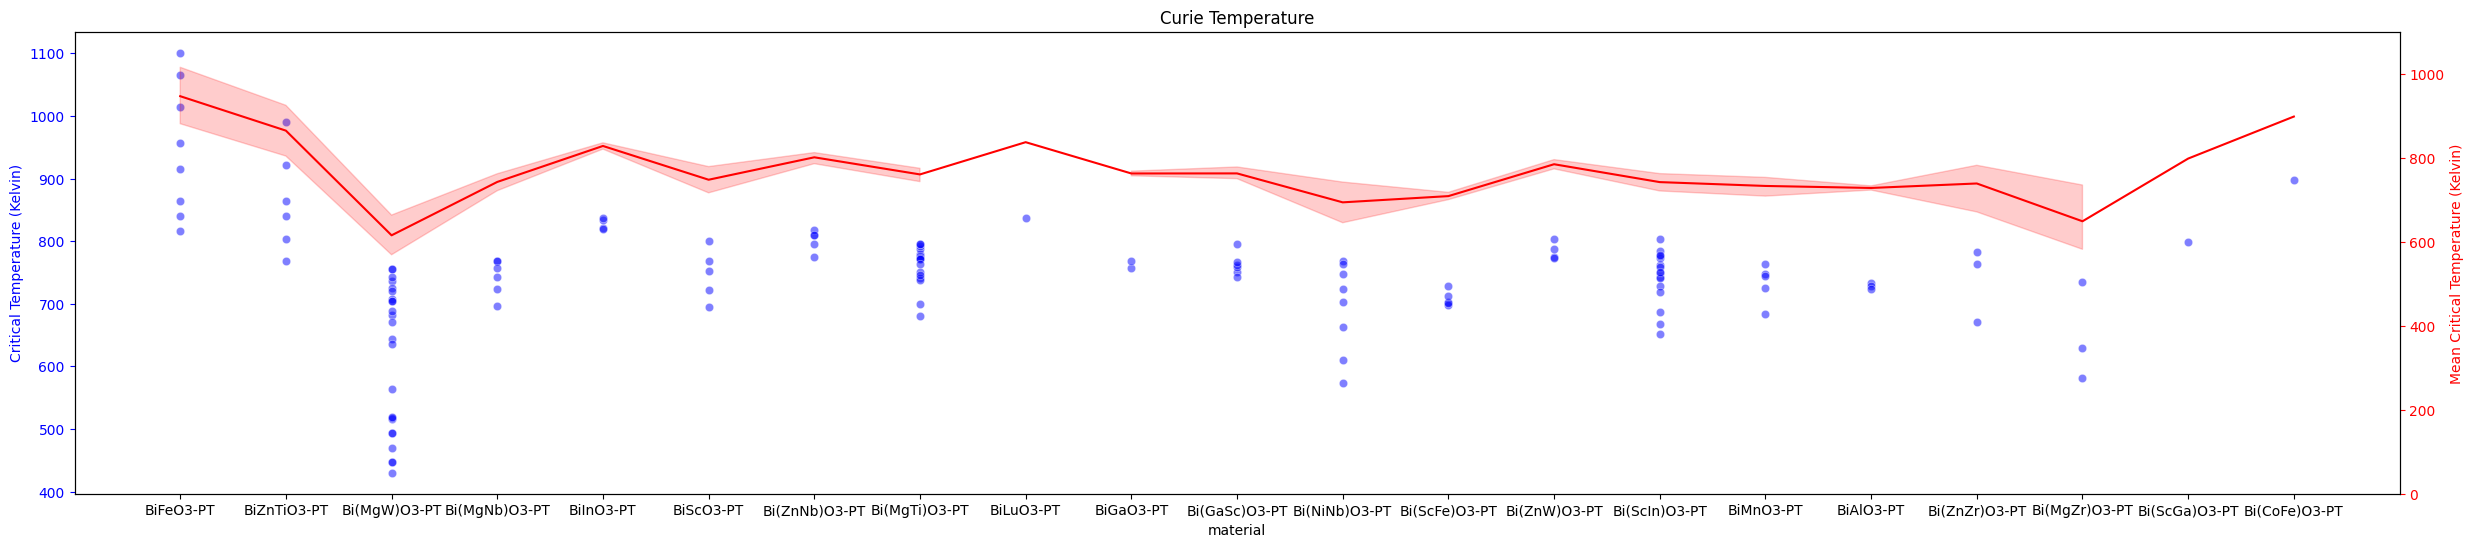

In [42]:

# Create figure and first y-axis
fig, ax1 = plt.subplots(figsize=(30, 6))

# Scatter points on the first y-axis
sns.scatterplot(x='Compound', y='Ferroelectric_Tc_in_Kelvin', data=train_df, color='blue', alpha=0.5, ax=ax1)
ax1.set_ylabel('Critical Temperature (Kelvin)', color='blue')
ax1.tick_params(axis='y', colors='blue')
# Create second y-axis
ax2 = ax1.twinx()

# Line plot on the second y-axis
sns.lineplot(x='Compound', y='Ferroelectric_Tc_in_Kelvin', data=train_df, color='red', ax=ax2)
ax2.set_ylabel('Mean Critical Temperature (Kelvin)', color='red')

# Set scale for the right y-axis
ax2.set_ylim(0, 1100)

# Set color of tick labels on the right y-axis to red
ax2.tick_params(axis='y', colors='red')

# Set title and x-axis label
ax1.set_title('Curie Temperature')
ax1.set_xlabel('material')

plt.show()

<a id="section-4"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">4.Data Prepocessing- EDA</p>

In [48]:
df_encoded.head()

,xBi(Me1Me2)O3,xPT,Tolerance_Factor,Ionic_Displacements,Ferroelectric_Tc_in_Kelvin,Compound_Bi(CoFe)O3-PT,Compound_Bi(GaSc)O3-PT,Compound_Bi(MgNb)O3-PT,Compound_Bi(MgTi)O3-PT,Compound_Bi(MgW)O3-PT,...,Compound_Bi(ZnW)O3-PT,Compound_Bi(ZnZr)O3-PT,Compound_BiAlO3-PT,Compound_BiFeO3-PT,Compound_BiGaO3-PT,Compound_BiInO3-PT,Compound_BiLuO3-PT,Compound_BiMnO3-PT,Compound_BiScO3-PT,Compound_BiZnTiO3-PT
0,0.2,0.8,1.0152,0.0878,816,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0.3,0.7,1.0095,0.0935,840,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.4,0.6,1.0036,0.0994,864,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0.5,0.5,0.9975,0.1055,915,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.6,0.4,0.9916,0.1114,956,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [49]:
df_encoded.shape

(132, 26)

In [50]:
# splitting into independant and target features

features = df_encoded.drop(columns = ['Ferroelectric_Tc_in_Kelvin'])
target =  df_encoded['Ferroelectric_Tc_in_Kelvin']

In [51]:
features.head()

,xBi(Me1Me2)O3,xPT,Tolerance_Factor,Ionic_Displacements,Compound_Bi(CoFe)O3-PT,Compound_Bi(GaSc)O3-PT,Compound_Bi(MgNb)O3-PT,Compound_Bi(MgTi)O3-PT,Compound_Bi(MgW)O3-PT,Compound_Bi(MgZr)O3-PT,...,Compound_Bi(ZnW)O3-PT,Compound_Bi(ZnZr)O3-PT,Compound_BiAlO3-PT,Compound_BiFeO3-PT,Compound_BiGaO3-PT,Compound_BiInO3-PT,Compound_BiLuO3-PT,Compound_BiMnO3-PT,Compound_BiScO3-PT,Compound_BiZnTiO3-PT
0,0.2,0.8,1.0152,0.0878,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,0.3,0.7,1.0095,0.0935,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0.4,0.6,1.0036,0.0994,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0.5,0.5,0.9975,0.1055,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.6,0.4,0.9916,0.1114,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [52]:
target

0      816
1      840
2      864
3      915
4      956
      ... 
127    728
128    718
129    798
130    728
131    898
Name: Ferroelectric_Tc_in_Kelvin, Length: 132, dtype: int64

In [53]:
## standardize the dataset

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [54]:
features_scaled = std_scaler.fit_transform(features)

In [55]:
features_scaled

array([[-0.47740645,  0.47707666,  0.78722327, ..., -0.19841895,
        -0.19841895, -0.21821789],
       [ 0.09548129, -0.09645812,  0.41383438, ..., -0.19841895,
        -0.19841895, -0.21821789],
       [ 0.66836904, -0.66999291,  0.02734414, ..., -0.19841895,
        -0.19841895, -0.21821789],
       ...,
       [-0.19096258,  0.19030927,  0.16490846, ..., -0.19841895,
        -0.19841895, -0.21821789],
       [ 0.66836904, -0.66999291, -1.24348821, ..., -0.19841895,
        -0.19841895, -0.21821789],
       [-0.47740645,  0.47707666,  0.85273009, ..., -0.19841895,
        -0.19841895, -0.21821789]])

<a id="section-5"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.TRAIN MODEL (BASELINE)</p>

In [56]:
### Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled,target, test_size= 0.3, random_state=40)

In [57]:
print(f'Train dataset shape: {X_train.shape}, {y_train.shape}')
print(f'Test dataset shape: {X_test.shape}, {y_test.shape}')

Train dataset shape: (92, 25), (92,)
Test dataset shape: (40, 25), (40,)


In [62]:
# writting Function to visualize our models performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def PerformanceCalculator(trueVals, predVals, name):
    plt.plot([300,1100], [300,1100], color='red')  # Plotting diagonal line
    plt.scatter(trueVals, predVals, color='green', alpha=0.7)  # Plotting the points
    rmse = np.sqrt(mean_squared_error(trueVals, predVals))  # Calculating RMSE
    mae = mean_absolute_error(trueVals, predVals)  # Calculating MAE
    mse = mean_squared_error(trueVals, predVals)  # Calculating MSE
    r2 = r2_score(trueVals, predVals)  # Calculating R2
    plt.title('Performance Metrics for {}'.format(name))
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    return rmse, mae, mse, r2


<a id="section-5.1"></a>
# <p style="text-align:left;color:#00FFFF;font-size:20px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.1 LINEAR REGRESSION</p>

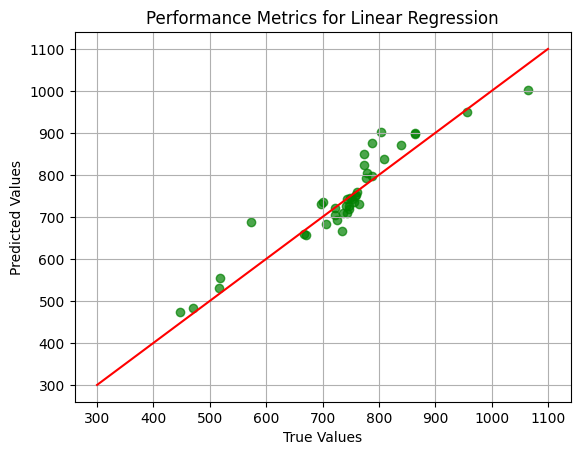

RMSE for Linear Regression  : 40.35544804168452
MAE for Linear Regression   : 30.218789268169246
MSE for Linear Regression   : 1628.5621866450986
R2 for Linear Regression    : 0.8735995571577966


In [63]:
# lets start our Analysis with linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Linear Regression')
print("RMSE for Linear Regression  :", rmse)
print("MAE for Linear Regression   :", mae)
print("MSE for Linear Regression   :", mse)
print("R2 for Linear Regression    :", r2)

<a id="section-5.2"></a>
# <p style="text-align:left;color:#00FFFF;font-size:20px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.2. DECISION TREE</p>

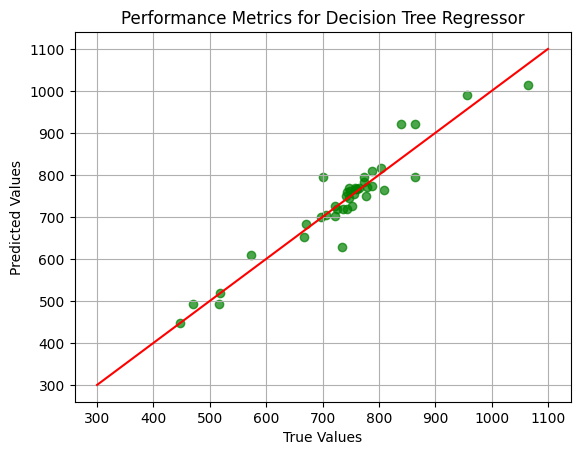

RMSE for Decision Tree Regressor  : 35.08560958569767
MAE for Decision Tree Regressor   : 24.0
MSE for Decision Tree Regressor   : 1231.0
R2 for Decision Tree Regressor    : 0.9044562458745943


In [64]:
# lets do one better by using a decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Decision Tree Regressor')
print("RMSE for Decision Tree Regressor  :", rmse)
print("MAE for Decision Tree Regressor   :", mae)
print("MSE for Decision Tree Regressor   :", mse)
print("R2 for Decision Tree Regressor    :", r2)

<a id="section-5.3"></a>
# <p style="text-align:left;color:#00FFFF;font-size:25px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.3. GRADIENT BOOST REGRESSOR</p>

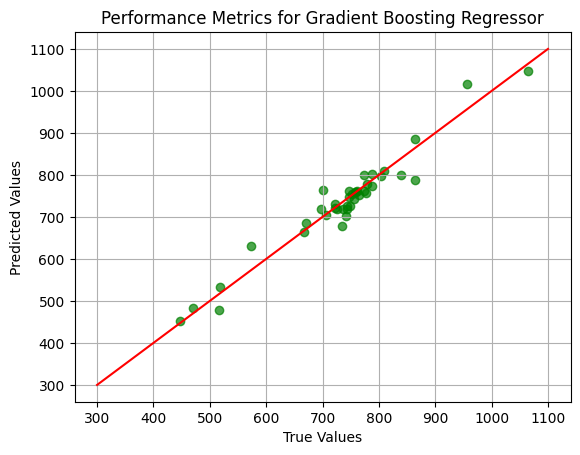

RMSE for Gradient Boosting Regressor  : 27.7392727444857
MAE for Gradient Boosting Regressor   : 19.639794009784953
MSE for Gradient Boosting Regressor   : 769.4672523929672
R2 for Gradient Boosting Regressor    : 0.9402779935254385


In [65]:
# lets Try gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Gradient Boosting Regressor')
print("RMSE for Gradient Boosting Regressor  :", rmse)
print("MAE for Gradient Boosting Regressor   :", mae)
print("MSE for Gradient Boosting Regressor   :", mse)
print("R2 for Gradient Boosting Regressor    :", r2)

<a id="section-5.4"></a>
# <p style="text-align:left;color:#00FFFF;font-size:25px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.4. RANDOM FOREST REGRESSOR</p>

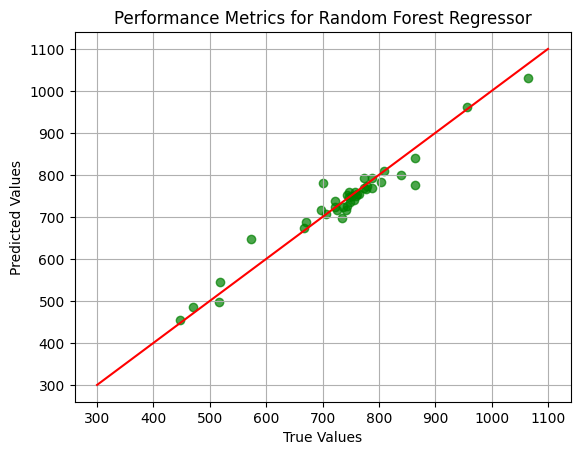

RMSE for Random Forest Regressor  : 27.70922577891102
MAE for Random Forest Regressor   : 18.851533333333332
MSE for Random Forest Regressor   : 767.801193266667
R2 for Random Forest Regressor    : 0.9404073042837826


In [66]:
# lets try Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Random Forest Regressor')
print("RMSE for Random Forest Regressor  :", rmse)
print("MAE for Random Forest Regressor   :", mae)
print("MSE for Random Forest Regressor   :", mse)
print("R2 for Random Forest Regressor    :", r2)

<a id="section-5.5"></a>
# <p style="text-align:left;color:#00FFFF;font-size:25px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.5. K NEAREST NEIGHBOUR REGRESSOR</p>

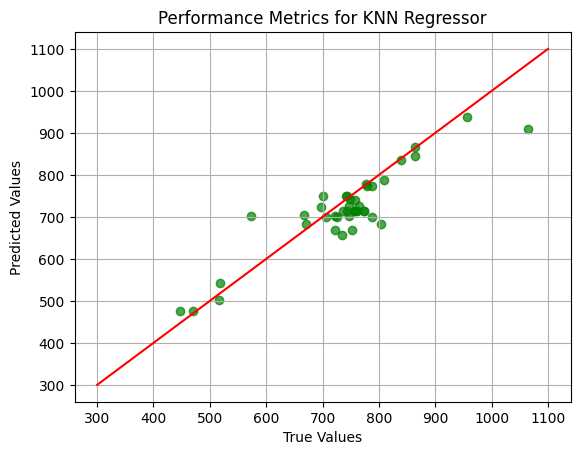

RMSE for KNN Regressor  : 51.51393015486199
MAE for KNN Regressor   : 37.335
MSE for KNN Regressor   : 2653.6849999999995
R2 for KNN Regressor    : 0.7940349088819844


In [67]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNN regressor with desired parameters
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'KNN Regressor')
print("RMSE for KNN Regressor  :", rmse)
print("MAE for KNN Regressor   :", mae)
print("MSE for KNN Regressor   :", mse)
print("R2 for KNN Regressor    :", r2)

<a id="section-5.6"></a>
# <p style="text-align:left;color:#00FFFF;font-size:25px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.6. SUPPORT VECTOR REGRESSOR</p>


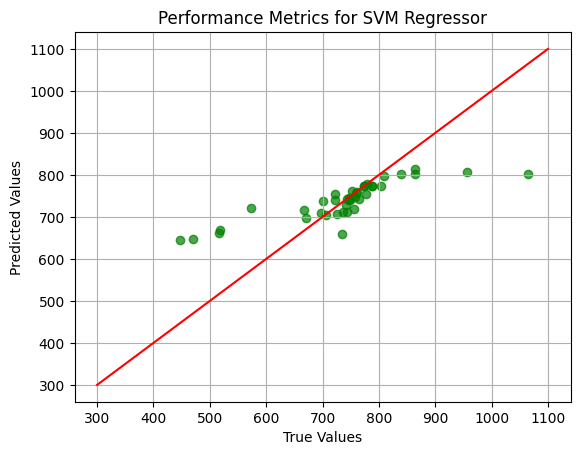

RMSE for SVM Regressor  : 79.57480850293497
MAE for SVM Regressor   : 47.87394692090769
MSE for SVM Regressor   : 6332.150148278771
R2 for SVM Regressor    : 0.5085317653515042


In [75]:
from sklearn.svm import SVR

# Instantiate SVM regressor with desired parameters
svm = SVR(kernel='linear')  # You can choose different kernels and adjust other parameters as needed

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
predictions = svm.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'SVM Regressor')
print("RMSE for SVM Regressor  :", rmse)
print("MAE for SVM Regressor   :", mae)
print("MSE for SVM Regressor   :", mse)
print("R2 for SVM Regressor    :", r2)


<a id="section-5.7"></a>
# <p style="text-align:left;color:#00FFFF;font-size:25px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.7. RIDGE REGRESSOR</p>

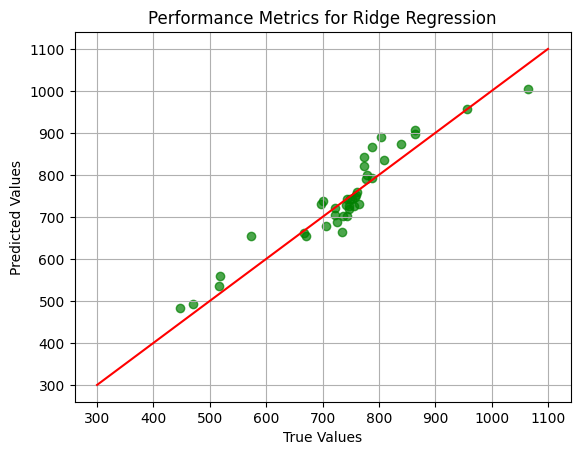

RMSE for Ridge Regression  : 37.73504026951127
MAE for Ridge Regression   : 29.953807268790094
MSE for Ridge Regression   : 1423.9332641416374
R2 for Ridge Regression    : 0.8894817793012713


In [76]:
from sklearn.linear_model import Ridge

# Instantiate Ridge regressor with desired parameters
ridge = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
ridge.fit(X_train, y_train)

# Make predictions
predictions = ridge.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Ridge Regression')
print("RMSE for Ridge Regression  :", rmse)
print("MAE for Ridge Regression   :", mae)
print("MSE for Ridge Regression   :", mse)
print("R2 for Ridge Regression    :", r2)


<a id="section-5.8"></a>
# <p style="text-align:left;color:#00FFFF;font-size:25px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">5.8. LASSO REGRESSOR</p>


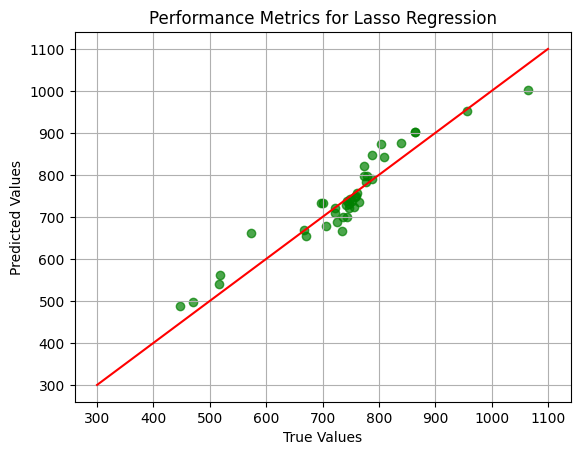

RMSE for Lasso Regression  : 35.40613256553252
MAE for Lasso Regression   : 28.62968023957753
MSE for Lasso Regression   : 1253.594223248063
R2 for Lasso Regression    : 0.9027026009431016


In [77]:
from sklearn.linear_model import Lasso

# Instantiate Lasso regressor with desired parameters
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Fit the model
lasso.fit(X_train, y_train)

# Make predictions
predictions = lasso.predict(X_test)

# Evaluate performance
rmse, mae, mse, r2 = PerformanceCalculator(y_test, predictions, 'Lasso Regression')
print("RMSE for Lasso Regression  :", rmse)
print("MAE for Lasso Regression   :", mae)
print("MSE for Lasso Regression   :", mse)
print("R2 for Lasso Regression    :", r2)

<a id="section-6"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;"> Comparision of Different Regression Models </p>

In [78]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting Regr': GradientBoostingRegressor(),
    'Random Forest Regr': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'SVM Regressor': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Create empty lists to store performance metrics
model_names = []
rmse_values = []
mae_values = []
mse_values = []
r2_values = []

# Function to calculate and append metrics to the lists
def add_metrics_to_lists(model_name, trueVals, predVals):
    global model_names, rmse_values, mae_values, mse_values, r2_values
    rmse = mean_squared_error(trueVals, predVals, squared=False)
    mae = mean_absolute_error(trueVals, predVals)
    mse = mean_squared_error(trueVals, predVals)
    r2 = r2_score(trueVals, predVals)
    model_names.append(model_name)
    rmse_values.append(rmse)
    mae_values.append(mae)
    mse_values.append(mse)
    r2_values.append(r2)

# Assuming you have X_train, y_train, X_test, y_test defined

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    add_metrics_to_lists(model_name, y_test, predictions)

# Create DataFrame from lists
metrics_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'MSE': mse_values,
    'R2': r2_values
})

# Display the DataFrame
metrics_df


,Model,RMSE,MAE,MSE,R2
0,Linear Regression,40.355448,30.218789,1628.562187,0.873600
1,Decision Tree,40.044663,26.675000,1603.575000,0.875539
2,Gradient Boosting Regr,28.264230,20.255123,798.866695,0.937996
3,Random Forest Regr,27.864021,18.971250,776.403641,0.939740
4,KNN Regressor,51.513930,37.335000,2653.685000,0.794035
5,SVM Regressor,112.375201,69.675667,12628.185841,0.019867
6,Ridge Regression,37.735040,29.953807,1423.933264,0.889482
7,Lasso Regression,35.406133,28.629680,1253.594223,0.902703


1. **Mean Absolute Error (MAE)** –is the mean of the absolute errors. It is calculated as::

$$MAE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|$$

where $n$ is the number of observations.

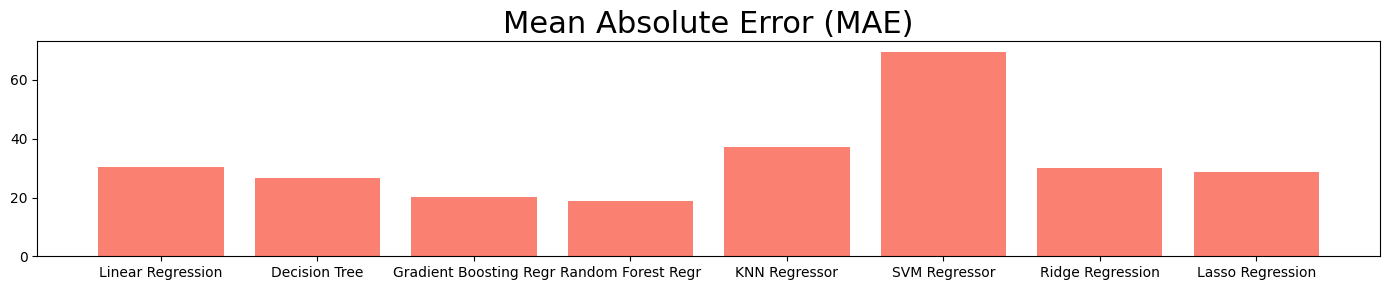

In [79]:
# Create a figure and set its size
plt.figure(figsize=(14, 3))

# Plot MAE
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='salmon')
plt.title('Mean Absolute Error (MAE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

==================================================================================================================================================================================================
==================================================================================================================================================================================================

2. **Mean Squared Error (MSE)** – is the mean of the squared errors and is calculated as: $$MSE = \frac{1}{n}*sum_{i=1}^n|y_i-y_{pred_i}|^2$$
where $n$ is the number of observations.

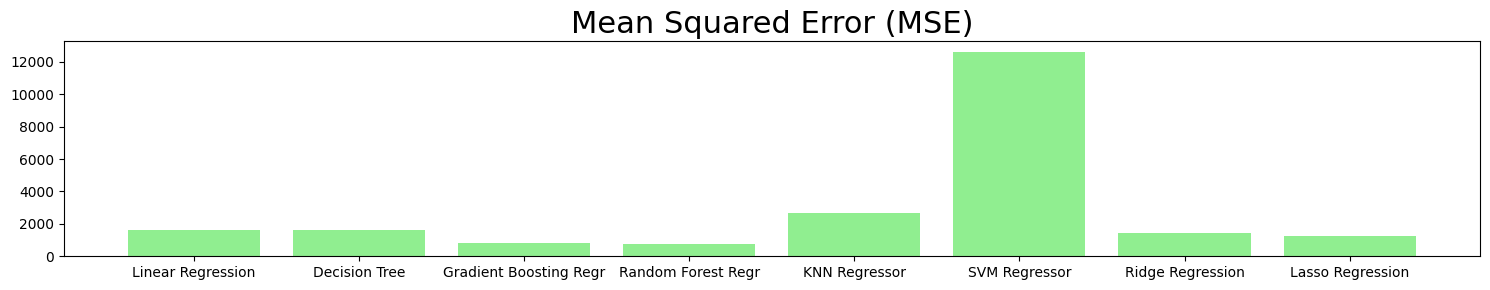

In [80]:
# Create a figure and set its size
plt.figure(figsize=(15, 3))
# Plot MSE

plt.bar(metrics_df['Model'], metrics_df['MSE'], color='lightgreen')
plt.title('Mean Squared Error (MSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

==================================================================================================================================================================================================
==================================================================================================================================================================================================


3. **Coefficient determination $R^2$**
$$R^2 = 1 - \frac{\sum_{i=1}^n(y_{pred_i}-y_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$
where $n$ is the number of observations, $y_i$ are the actual values of $y$ (i.e., the correct answers) for each observation, $y_{pred_i}$ are the values predicted by the model, and $y_{mean}$ is the mean of all the actual values $y_i$.


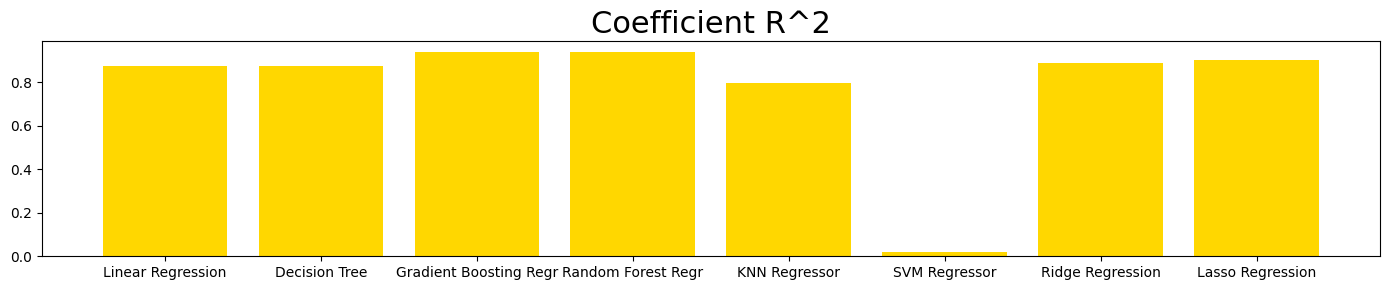

In [81]:
# Create a figure and set its size
plt.figure(figsize=(14, 3))
plt.bar(metrics_df['Model'], metrics_df['R2'], color='gold')
plt.title('Coefficient R^2', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()

# Show the plot
plt.show()

==================================================================================================================================================================================================
==================================================================================================================================================================================================

4. **Root Mean Squared Error (RMSE)** –is the root mean of the squared errors and is calculated as: $$RMSE  =  (MSE)^1/2 $$

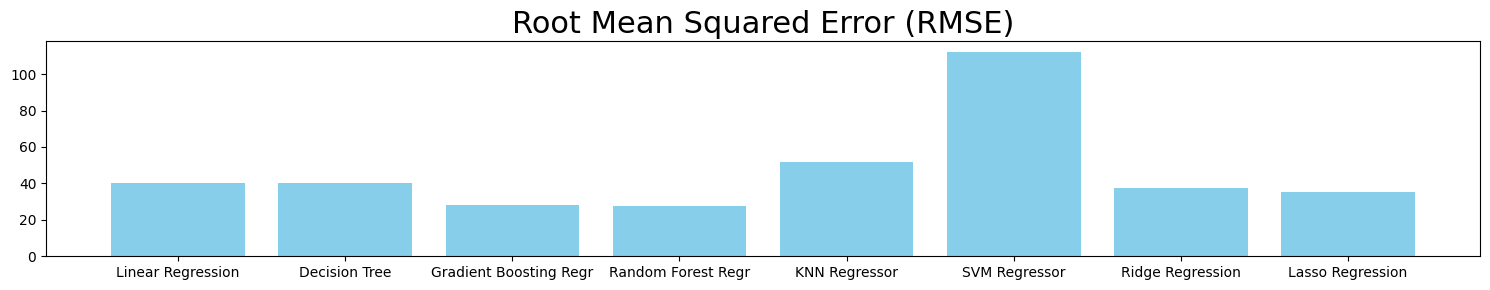

In [82]:
# Create a figure and set its size
plt.figure(figsize=(15, 3))

# Plot RMSE
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='skyblue')
plt.title('Root Mean Squared Error (RMSE)', size= 22)
plt.xticks(rotation=0, ha='center', wrap=True)
plt.tight_layout()
plt.show()

<a id="section-7"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">Hyperparameter Tuning for Random Forest </p>

In [84]:
n_estimators = [100, 500, 1000]
max_depths = [30, 50, 100]
min_samples_leafs = [2, 5, 10]
test_results = []

for estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs: 
            rf = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, min_samples_leaf=min_samples_leaf, n_jobs=-1, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            
            # Calculating evaluation metrics
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            
            # Appending results
            test_results.append((estimator, max_depth, min_samples_leaf, r2, mse, mae, rmse))
            
            print("Number of estimators:", estimator, "Max depth:", max_depth, "Min leafs:", min_samples_leaf, "R2 Score:", r2, "MSE:", mse, "MAE:", mae, "RMSE:", rmse)



Number of estimators: 100 Max depth: 30 Min leafs: 2 R2 Score: 0.9276549822264128 MSE: 932.1040155319272 MAE: 21.046246428571454 RMSE: 30.530378568434543
Number of estimators: 100 Max depth: 30 Min leafs: 5 R2 Score: 0.7577344443798418 MSE: 3121.3856070274887 MAE: 40.60323966346046 RMSE: 55.86936197082878
Number of estimators: 100 Max depth: 30 Min leafs: 10 R2 Score: 0.5319686427208008 MSE: 6030.185919369197 MAE: 54.21537067916065 RMSE: 77.65427173935248
Number of estimators: 100 Max depth: 50 Min leafs: 2 R2 Score: 0.9276549822264128 MSE: 932.1040155319273 MAE: 21.046246428571457 RMSE: 30.530378568434543
Number of estimators: 100 Max depth: 50 Min leafs: 5 R2 Score: 0.7577344443798416 MSE: 3121.385607027492 MAE: 40.603239663460485 RMSE: 55.869361970828805
Number of estimators: 100 Max depth: 50 Min leafs: 10 R2 Score: 0.5319686427208008 MSE: 6030.185919369197 MAE: 54.21537067916065 RMSE: 77.65427173935248


Number of estimators: 100 Max depth: 100 Min leafs: 2 R2 Score: 0.9276549822264128 MSE: 932.1040155319264 MAE: 21.04624642857143 RMSE: 30.53037856843453
Number of estimators: 100 Max depth: 100 Min leafs: 5 R2 Score: 0.7577344443798416 MSE: 3121.3856070274915 MAE: 40.603239663460485 RMSE: 55.8693619708288
Number of estimators: 100 Max depth: 100 Min leafs: 10 R2 Score: 0.5319686427208012 MSE: 6030.185919369192 MAE: 54.21537067916064 RMSE: 77.65427173935244
Number of estimators: 500 Max depth: 30 Min leafs: 2 R2 Score: 0.9283688797895413 MSE: 922.9060526901318 MAE: 21.712859639249626 RMSE: 30.37936886589535
Number of estimators: 500 Max depth: 30 Min leafs: 5 R2 Score: 0.7451232840521214 MSE: 3283.8696804819133 MAE: 42.02589665807144 RMSE: 57.30505807066173
Number of estimators: 500 Max depth: 30 Min leafs: 10 R2 Score: 0.5222720790830818 MSE: 6155.117893701762 MAE: 54.607272152728044 RMSE: 78.45455941946116
Number of estimators: 500 Max depth: 50 Min leafs: 2 R2 Score: 0.92836887978954

In [85]:
# Define column names
columns = ['Estimator', 'Max Depth', 'Min Samples Leaf', 'R2 Score', 'MSE', 'MAE', 'RMSE']

# Convert list to DataFrame
test_results_df = pd.DataFrame(test_results, columns=columns)

# Print the DataFrame
test_results_df


,Estimator,Max Depth,Min Samples Leaf,R2 Score,MSE,MAE,RMSE
0,100,30,2,0.927655,932.104016,21.046246,30.530379
1,100,30,5,0.757734,3121.385607,40.603240,55.869362
2,100,30,10,0.531969,6030.185919,54.215371,77.654272
3,100,50,2,0.927655,932.104016,21.046246,30.530379
4,100,50,5,0.757734,3121.385607,40.603240,55.869362
5,100,50,10,0.531969,6030.185919,54.215371,77.654272
6,100,100,2,0.927655,932.104016,21.046246,30.530379
7,100,100,5,0.757734,3121.385607,40.603240,55.869362
8,100,100,10,0.531969,6030.185919,54.215371,77.654272
9,500,30,2,0.928369,922.906053,21.712860,30.379369


In [90]:
best_r2_index = test_results_df['R2 Score'].idxmax()
best_params_r2 = test_results_df.loc[best_r2_index, ['Estimator', 'Max Depth', 'Min Samples Leaf', 'R2 Score']]
print("Best parameters for maximizing R2 Score:")
print(best_params_r2)

print("************************************************")
best_mse_index = test_results_df['MSE'].idxmin()
best_params_mse = test_results_df.loc[best_mse_index, ['Estimator', 'Max Depth', 'Min Samples Leaf', 'MSE']]
print("Best parameters for minimizing MSE:")
print(best_params_mse)

print("************************************************")
best_mae_index = test_results_df['MAE'].idxmin()
best_params_mae = test_results_df.loc[best_mae_index, ['Estimator', 'Max Depth', 'Min Samples Leaf', 'MAE']]
print("Best parameters for minimizing MAE:")
print(best_params_mae)
print("************************************************")
best_rmse_index = test_results_df['RMSE'].idxmin()
best_params_rmse = test_results_df.loc[best_rmse_index, ['Estimator', 'Max Depth', 'Min Samples Leaf', 'RMSE']]
print("Best parameters for minimizing RMSE:")
print(best_params_rmse)



Best parameters for maximizing R2 Score:
Estimator           500.000000
Max Depth            30.000000
Min Samples Leaf      2.000000
R2 Score              0.928369
Name: 9, dtype: float64
************************************************
Best parameters for minimizing MSE:
Estimator           500.000000
Max Depth            30.000000
Min Samples Leaf      2.000000
MSE                 922.906053
Name: 9, dtype: float64
************************************************
Best parameters for minimizing MAE:
Estimator           100.000000
Max Depth           100.000000
Min Samples Leaf      2.000000
MAE                  21.046246
Name: 6, dtype: float64
************************************************
Best parameters for minimizing RMSE:
Estimator           500.000000
Max Depth            30.000000
Min Samples Leaf      2.000000
RMSE                 30.379369
Name: 9, dtype: float64


In [94]:


rf = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_leaf=2, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
            
# Calculating evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
            


print("Number of estimators:", estimator, "Max depth:", max_depth, "Min leafs:", min_samples_leaf, "R2 Score:", r2, "MSE:", mse, "MAE:", mae, "RMSE:", rmse)

Number of estimators: 500 Max depth: 30 Min leafs: 2 R2 Score: 0.9283688797895412 MSE: 922.9060526901333 MAE: 21.712859639249622 RMSE: 30.379368865895376


# True values, Predicted values, errors for Random Forest
<a id="section-9"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">Data Prediction </p>

In [112]:
rf = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_leaf=2, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
ylab = y_test  # True target values
predVals = rf.predict(X_test)  # Predicted target values using Random Forest model

# Compute absolute error between true and predicted values
diff = abs(ylab - predVals)

# Create a dictionary to store true values, predicted values, and absolute error
ansFrame = {
    'True Tc': ylab,
    'Predicted Tc': predVals,
    'Absolute error': diff
}

# Create a pandas DataFrame from the dictionary
ansFrame = pd.DataFrame(ansFrame)

# Display the first 50 rows of the DataFrame
ansFrame


,True Tc,Predicted Tc,Absolute error
116,743,748.967611,5.967611
40,722,720.557275,1.442725
120,749,733.855975,15.144025
86,788,814.957109,26.957109
69,762,752.180998,9.819002
45,809,837.420217,28.420217
113,735,715.464044,19.535956
85,773,799.574202,26.574202
15,736,722.055615,13.944385
84,774,762.258152,11.741848


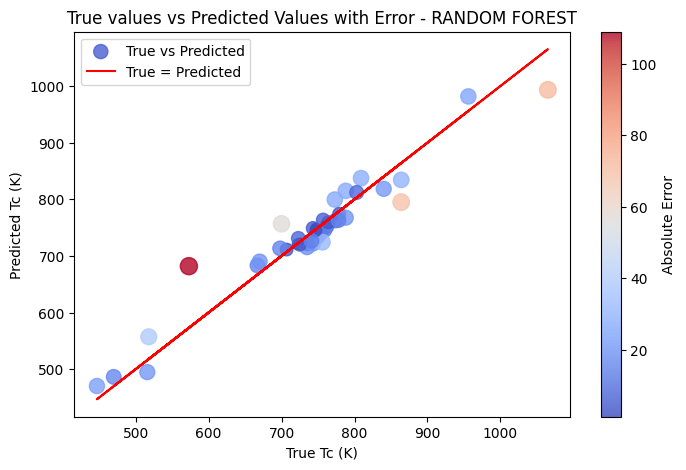

In [102]:
plt.figure(figsize=(8, 5))
# Calculate marker sizes based on absolute error
marker_sizes = 50 * (1 + np.log10(ansFrame['Absolute error']))

# Scatter plot of true vs predicted values with marker sizes based on error
plt.scatter(ansFrame['True Tc'], ansFrame['Predicted Tc'], s=marker_sizes, c=ansFrame['Absolute error'], cmap='coolwarm', alpha=0.8, label='True vs Predicted')

# Plot the line where true values equal predicted values for reference
plt.plot(ansFrame['True Tc'], ansFrame['True Tc'], color='red', label='True = Predicted')

plt.xlabel('True Tc (K)')
plt.ylabel('Predicted Tc (K)')
plt.title('True values vs Predicted Values with Error - RANDOM FOREST')
plt.colorbar(label='Absolute Error')
plt.legend()
plt.show()

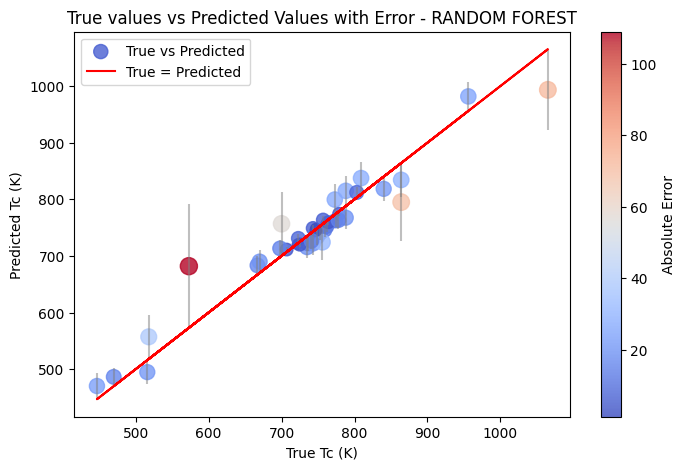

In [111]:
plt.figure(figsize=(8, 5))
# Calculate marker sizes based on absolute error
marker_sizes = 50 * (1 + np.log10(ansFrame['Absolute error']))

# Scatter plot of true vs predicted values with marker sizes based on error
plt.scatter(ansFrame['True Tc'], ansFrame['Predicted Tc'], s=marker_sizes, c=ansFrame['Absolute error'], cmap='coolwarm', alpha=0.8, label='True vs Predicted')

# Calculate error values for x and y axes (assuming you have them)
x_error = 0 # Error values for the x-axis
y_error = ansFrame['Absolute error']  # Error values for the y-axis

# Plot error bars
plt.errorbar(ansFrame['True Tc'], ansFrame['Predicted Tc'], xerr=x_error, yerr=y_error, fmt='none', ecolor='gray', alpha=0.5)

# Plot the line where true values equal predicted values for reference
plt.plot(ansFrame['True Tc'], ansFrame['True Tc'], color='red', label='True = Predicted')

plt.xlabel('True Tc (K)')
plt.ylabel('Predicted Tc (K)')
plt.title('True values vs Predicted Values with Error - RANDOM FOREST')
plt.colorbar(label='Absolute Error')
plt.legend()
plt.show()


# The errors seems to be less than 10% in most of the cases 

<a id="section-9"></a>
# <p style="text-align:center;color:#00FFFF;background-color:#0000FF;font-size:30px;font-weight:bolder;padding:0.2em 0 0.3em;border-radius:10px 10px;box-shadow:0px 0px 2px black;margin:0;">Conclusion & Future Scope </p>

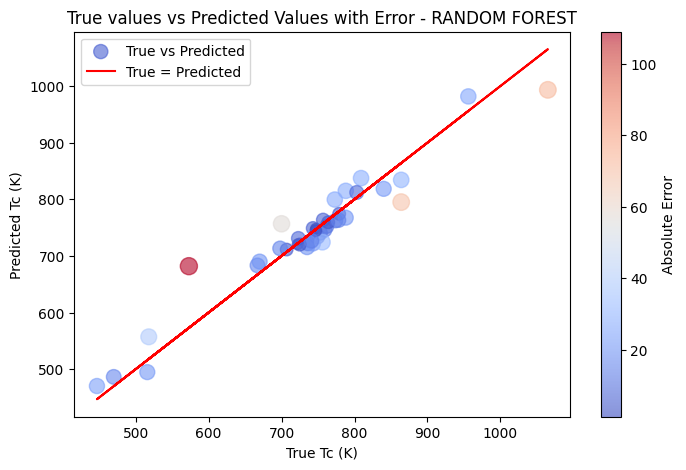 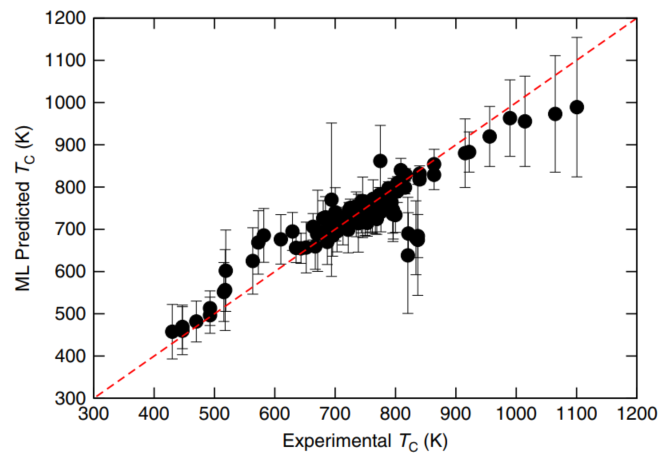

As the given dataset SUPERCON-df belongs to a regression category, several regression models were tried-

    - [Linear Regression]
    - [Decision Tree Regressor]
    - [Gradient Boosting Regressor]
    - [Random Forest Regressor]
    - [KNeighborsRegressor]
    - [SVM Regressor]
    - [Ridge Regression]
    - [Lasso Regression]
   


* Out of all the regression models the best R2-score was 0.92667 using Random Forest Regressor.
* Best R2-score from the Random Forest Regressor was about found  having max_depth:50 and min_leafs:2
* For the Random Forest Regressor the best parameters were

   - Number of estimators: 500 
   - Max depth: 30 
   - Min leafs: 2 
   

R2 Score: 0.9283688797895412 

MSE: 922.9060526901333 

MAE: 21.712859639249622 

RMSE: 30.379368865895376

### Future Scope:
Neural Networks can be implemented to obtain better accuracy